In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
from sklearn.datasets import fetch_olivetti_faces
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale, scale

In [2]:
X0, Y = fetch_olivetti_faces(return_X_y=True)
X0 = X0.astype('d')

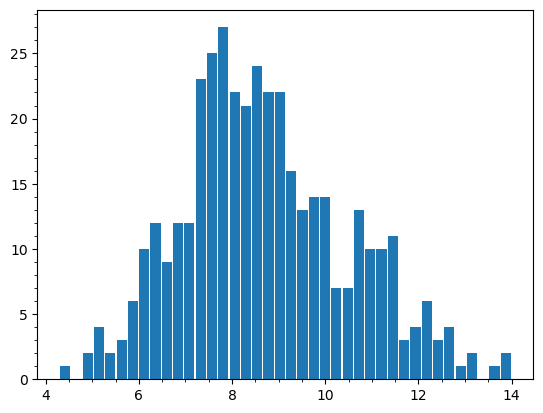

[0.4001343  0.43423554 0.47628099 ... 0.32141529 0.31364669 0.31045455]


In [3]:
c0 = pca.location(X0)
# plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=3)
plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.minorticks_on()
plt.show()
print(c0)

0.95
[0.39986669 0.43635804 0.48026385 ... 0.32644872 0.31951817 0.31544289]


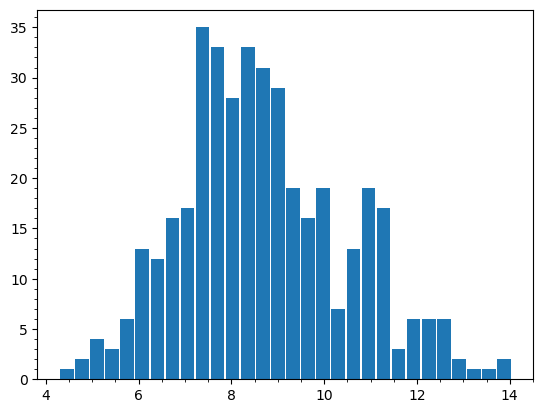

In [4]:
N = len(X0)
alpha = 0.95
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
c = pca.robust_location(X0, wma)
print(c)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4)
plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

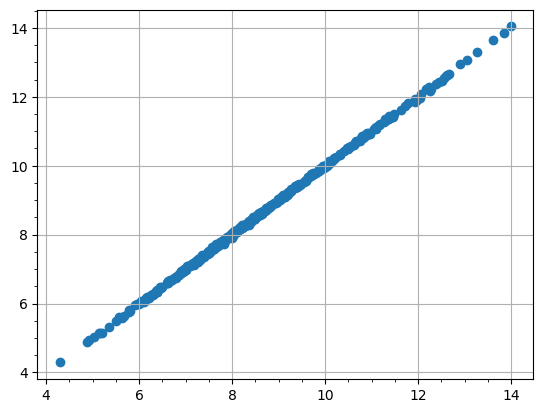

In [8]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [6]:
X1_0 = X0 - c0
X1 = X0 - c

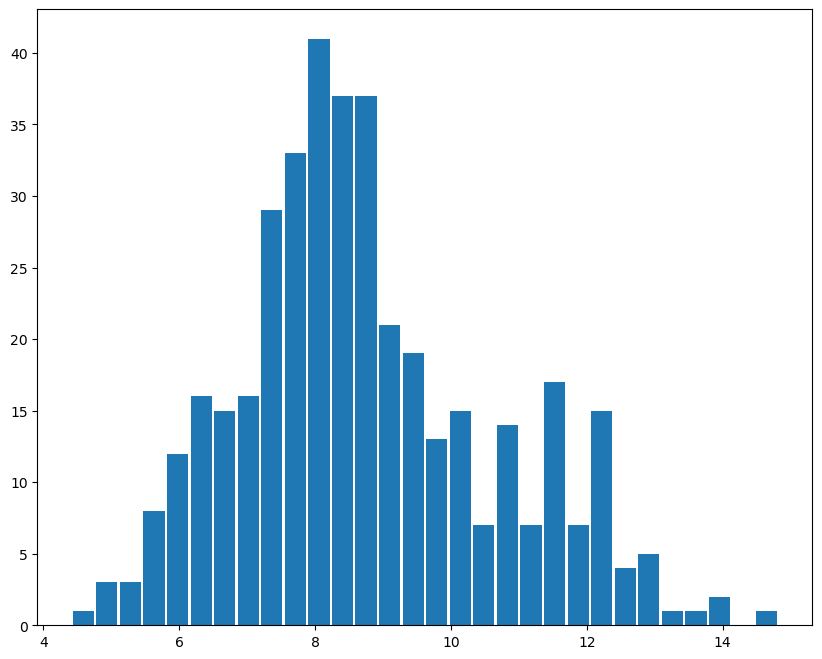

18.7930753560701 [ 0.00419112  0.00710952  0.00933611 ... -0.00018517 -0.00337967
 -0.00318827]


In [7]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

18.058756627594832 [ 0.00506338  0.00801386  0.00986059 ... -0.00090258 -0.00356976
 -0.00327695]


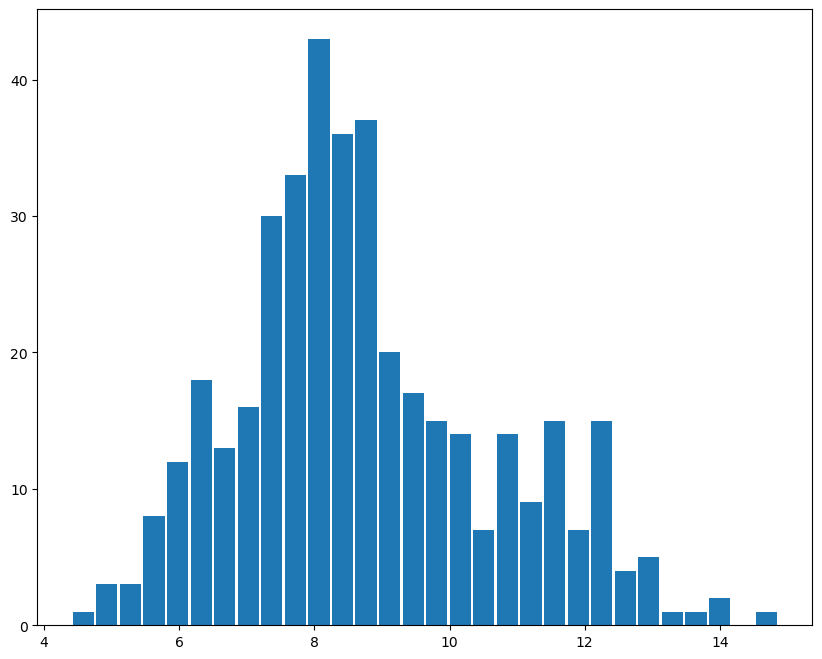

In [9]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a1, L1 = pca.find_robust_pc(X1, wma, n_iter=100)
print(L1, a1)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

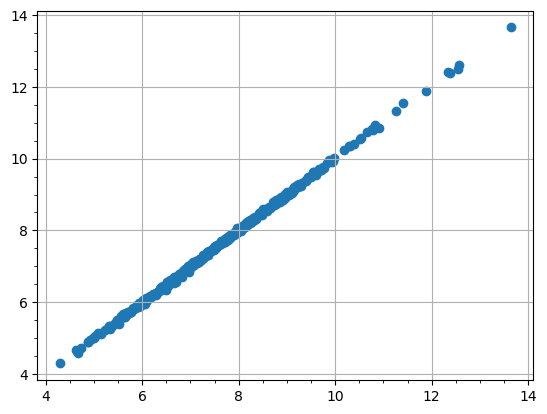

In [10]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [11]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

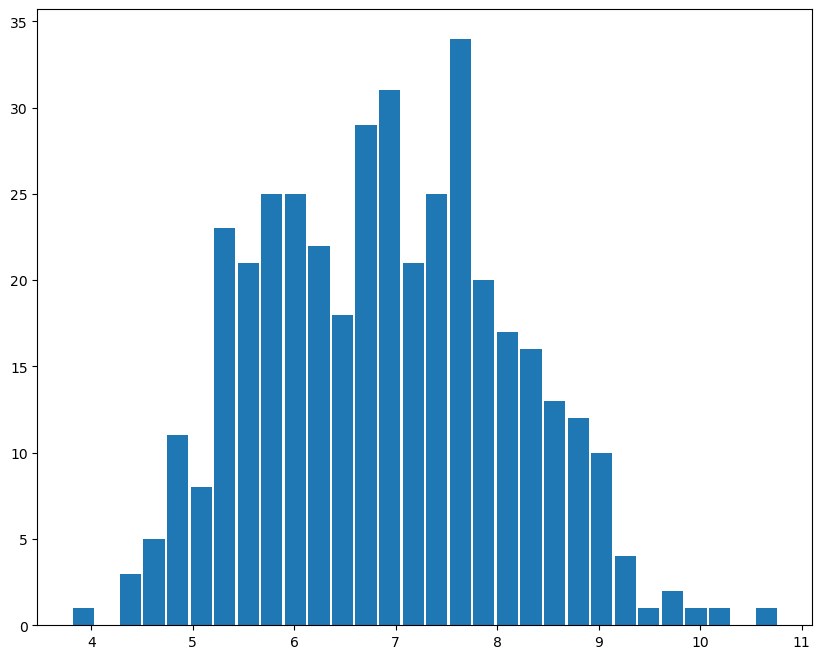

11.044082676510843 [ 0.02859139  0.03328836  0.03784649 ... -0.02962782 -0.02721298
 -0.02488899]


In [12]:
a2_0, L2_0 = pca.find_pc(X2_0)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

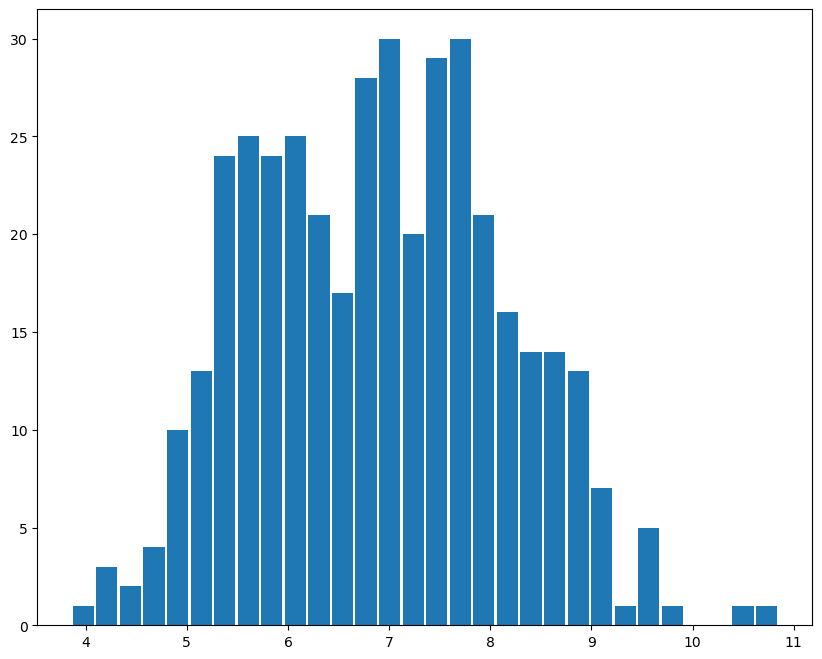

10.924518259796653 [ 0.02831633  0.03288891  0.0377824  ... -0.02970964 -0.02712618
 -0.02452922]


In [13]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a2, L2 = pca.find_robust_pc(X2, wma, n_iter=100)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

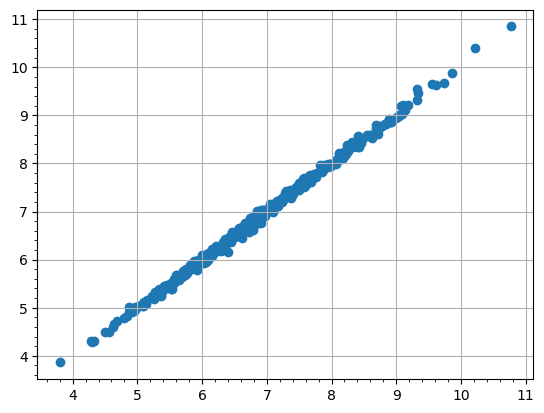

In [14]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [16]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

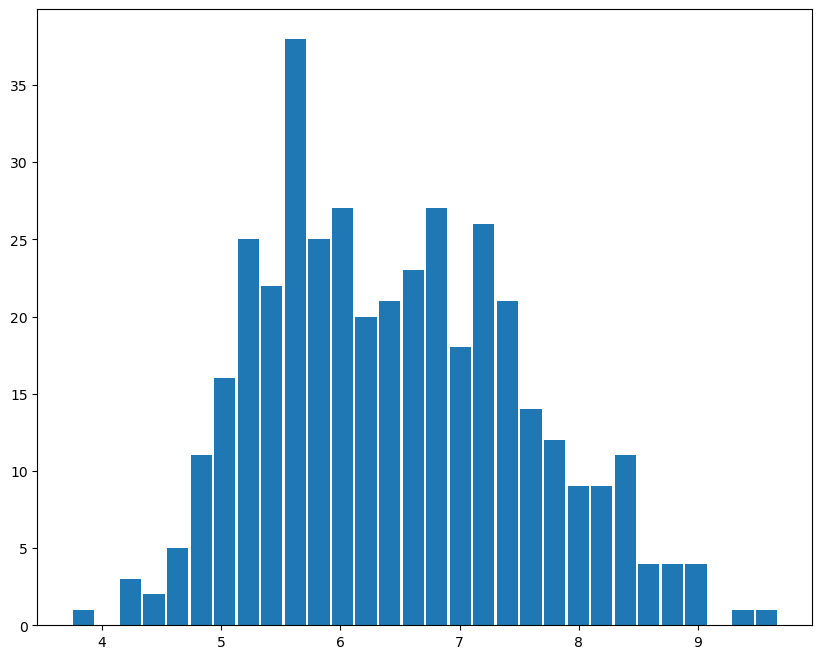

6.288853187816272 [-0.00135692  0.00032578  0.00019797 ...  0.01541368  0.01370981
  0.01188343]


In [17]:
a3_0, L3_0 = pca.find_pc(X3_0)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X3_0, a3_0), bins=30, rwidth=0.9)
plt.show()
print(L3_0, a3_0)

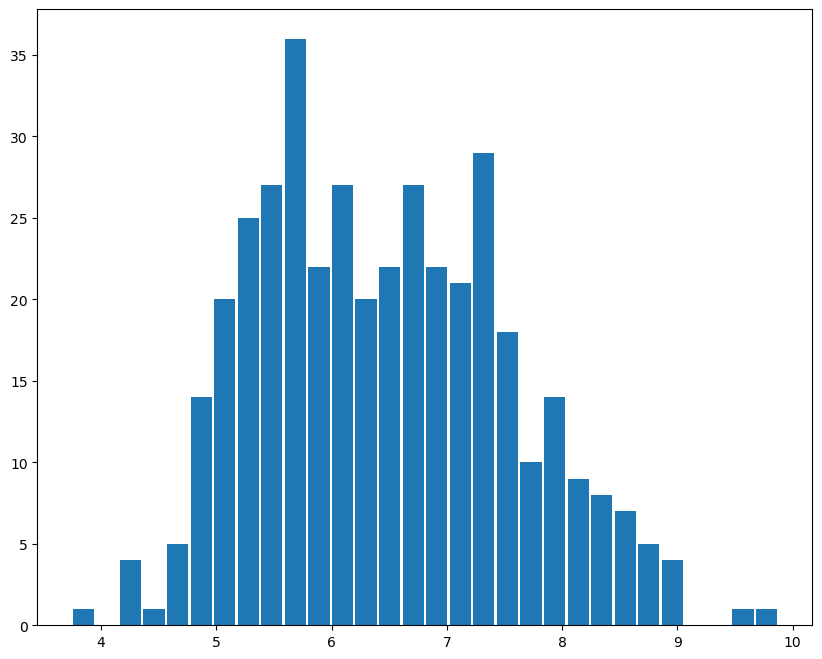

10.924518259796653 [ 0.02831633  0.03288891  0.0377824  ... -0.02970964 -0.02712618
 -0.02452922]


In [18]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a3, L3 = pca.find_robust_pc(X3, wma, n_iter=100)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X3, a3), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U3 = pca.project_line(X0, a3)
U3_0 = pca.project_line(X0, a3_0)

In [19]:
X4_0 = pca.project(X3_0, a3_0)
X4 = pca.project(X3, a3)

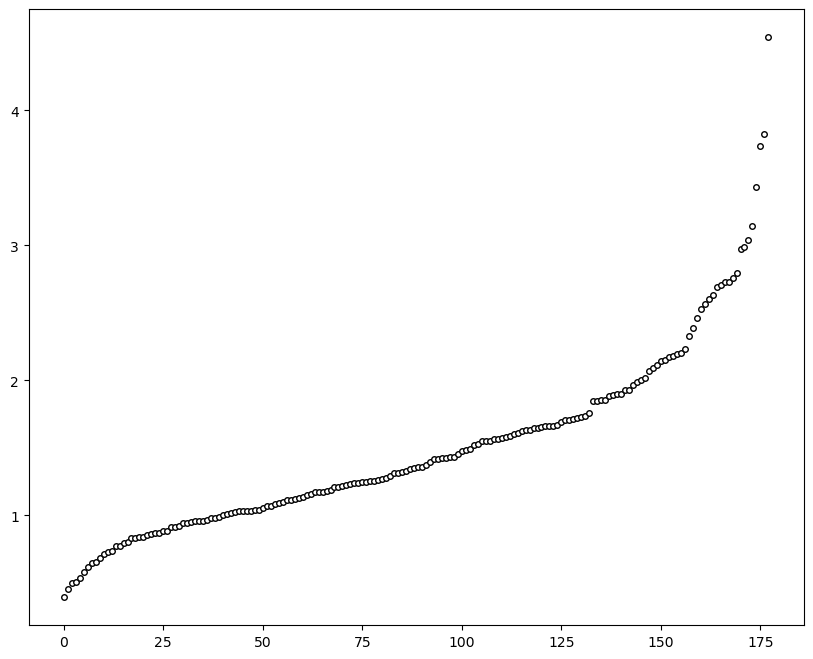

4.963138278385496 [ 0.14144678  0.16038953 -0.00977281 -0.33096528 -0.00539376 -0.07458465
 -0.16908672  0.01080556 -0.05012095  0.87889369 -0.06003494 -0.17820025
 -0.00311292]


In [57]:
a4_0, L4_0 = pca.find_pc(X4_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4_0, a4_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4_0, a4_0)

0.8876404494382022


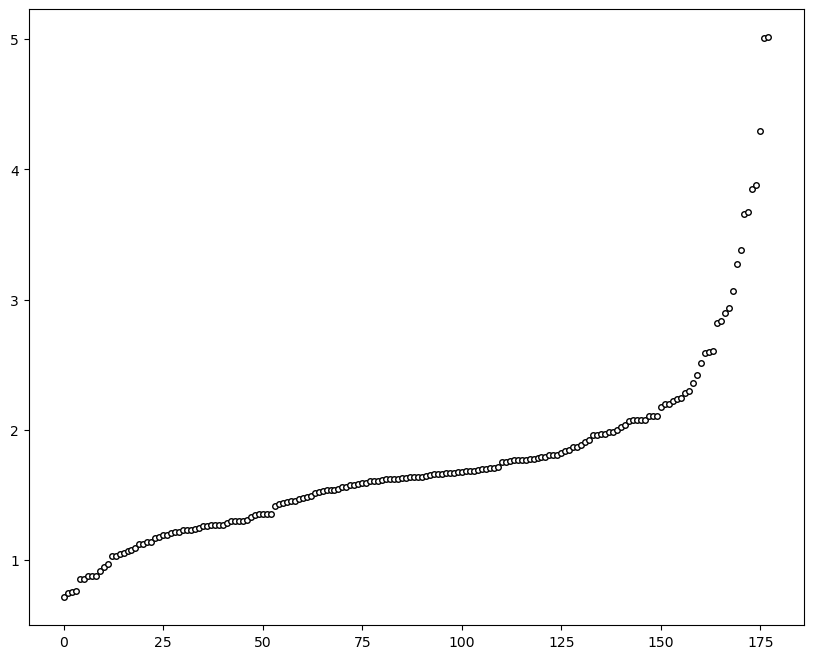

0.7415339248319794 [-0.08101479  0.50837038  0.03591847  0.29520088 -0.10239949  0.16362401
  0.14976561 -0.46447708  0.28051683 -0.04722886 -0.43528582  0.25563481
 -0.18812796]


In [19]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a4, L4 = pca.find_robust_pc(X4, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4, a4)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4, a4)
U4 = pca.project_line(X0, a4)
U4_0 = pca.project_line(X0, a4_0)

In [20]:
X5_0 = pca.project(X4_0, a4_0)
X5 = pca.project(X4, a4)

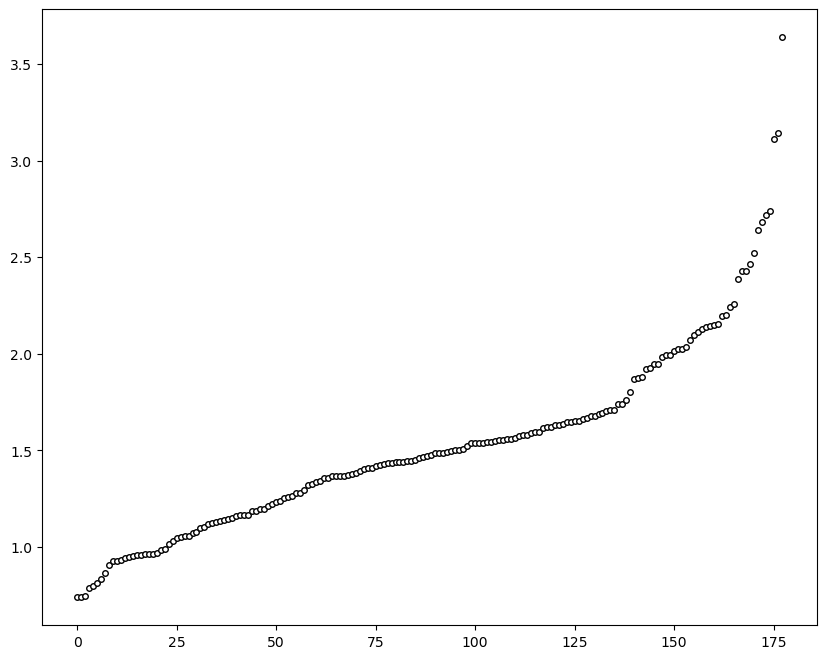

0.853228178354319 [ 0.26566367 -0.03521369  0.14302552 -0.06610296 -0.72704845  0.14931837
  0.10902581  0.500703   -0.13685993  0.07643674  0.17361461  0.10116097
  0.15786885]


In [21]:
a5_0, L5_0 = pca.find_pc(X5_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5_0, a5_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5_0, a5_0)

0.7752808988764045


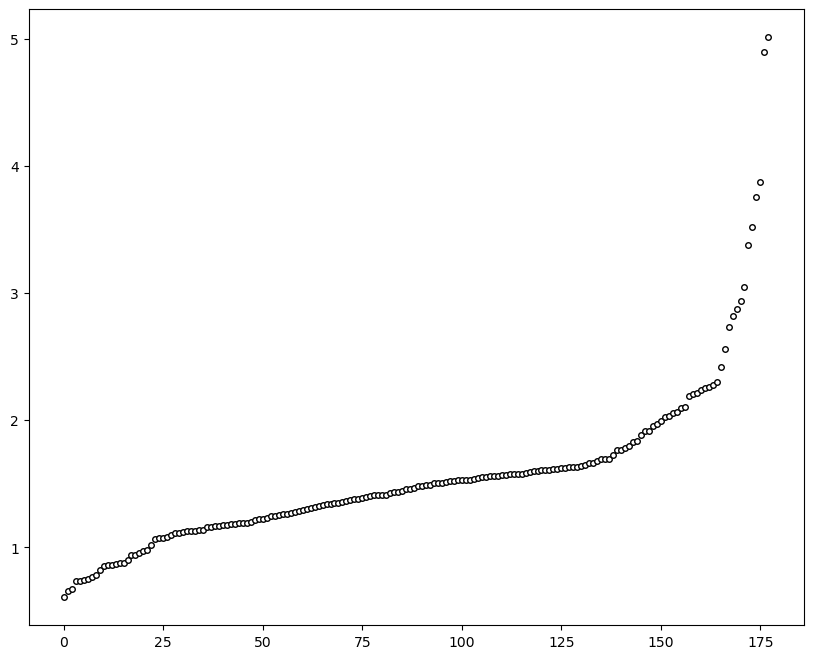

0.4523609643836153 [-0.23641041 -0.51957456  0.03236834  0.20933694 -0.21335427  0.2251164
  0.10393038  0.12840387  0.39173845  0.45100039 -0.28450975 -0.24391594
 -0.09216862]


In [22]:
N = len(X0)
alpha = (N - 40) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a5, L5 = pca.find_robust_pc(X5, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5, a5)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5, a5)
U5 = pca.project_line(X0, a5)
U5_0 = pca.project_line(X0, a5_0)

In [20]:
from sklearn.decomposition import PCA

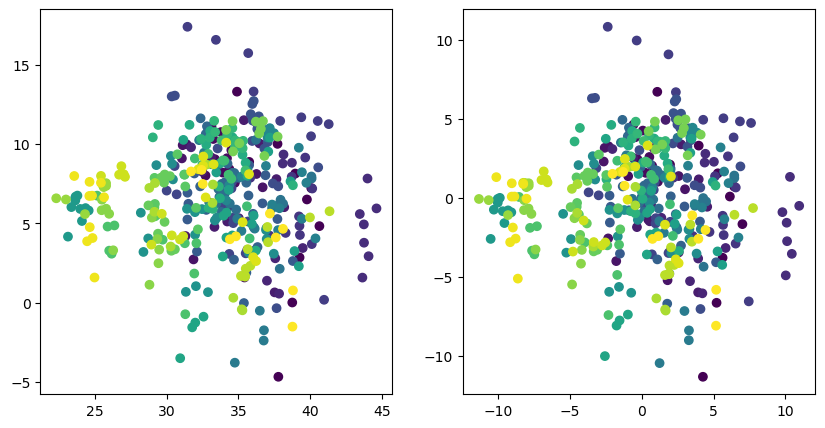

In [25]:
pca1 = PCA()
pca1.fit(X0)
U = pca1.transform(X0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y)
plt.subplot(1,2,2)
plt.scatter(-U[:,0], -U[:,1], c=Y)
plt.show()

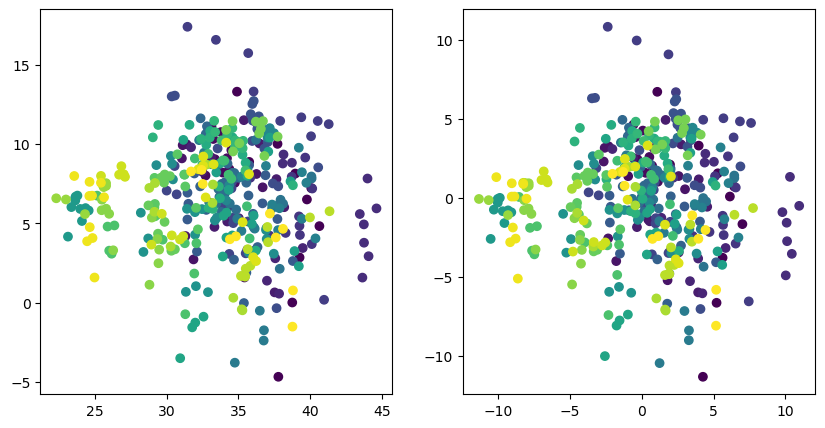

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y)
plt.subplot(1,2,2)
plt.scatter(-U[:,0], -U[:,1], c=Y)
plt.show()

In [26]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [27]:
N = len(X0)
alpha = (N - 30) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.8314606741573034


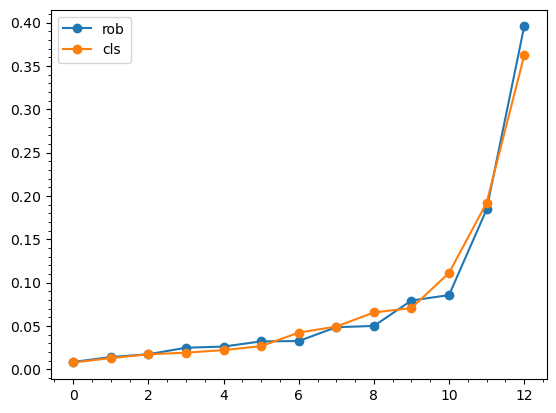

In [28]:
plt.plot(sorted(Ls/Ls.sum()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.sum()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [29]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

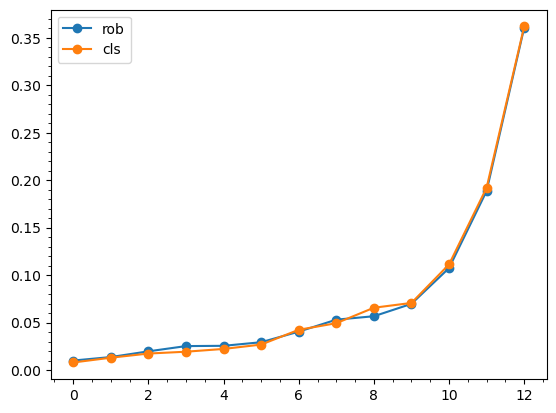

In [30]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [31]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [32]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[ 1.4302117  -0.24859084 -0.04153069  0.18310569 -0.17038825  0.01096298
  -0.10020004  0.06099318  0.16062199 -0.59493089 -0.08737255 -0.21015671
  -0.48979132]
 [-0.24859084  1.01567195 -0.16199119 -0.10612135 -0.02789334 -0.12202252
   0.50024275  0.06483915 -0.13326255  0.11685683  0.46928517  0.03088222
   0.04515558]
 [-0.04153069 -0.16199119  1.21313657 -0.74594833 -0.44200958  0.05006744
  -0.45962787 -0.18977731  0.24602013  0.02821834 -0.02780056  0.05789479
  -0.39850915]
 [ 0.18310569 -0.10612135 -0.74594833  1.42676121  0.16137343  0.13470508
   0.30285454 -0.14007483 -0.27070205  0.02805892  0.04025177 -0.09667397
   0.42698173]
 [-0.17038825 -0.02789334 -0.44200958  0.16137343  1.17063591 -0.15535136
  -0.0261532   0.20661051  0.05872839 -0.12042769 -0.04530551  0.18643694
  -0.02496215]
 [ 0.01096298 -0.12202252  0.05006744  0.13470508 -0.15535136  2.99090215
  -2.71602248 -0.99293309  0.11469424 -0.46428597  0.16794094 -0.96768657
  -0.08735603]
 [-0.10020004  0.50024

In [33]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.35210778 0.12533037 0.11131788 0.09507059 0.00324934 0.00817649
 0.01450213 0.02238978 0.02817405 0.04437163 0.05382437 0.07333323
 0.06815235]
